In [13]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
boston_data = datasets.load_boston()

In [3]:
# def sk_dataset_to_df(data):
#    return pd.DataFrame(data.data, columns=data.feature_names)
# boston = sk_dataset_to_df(boston_data)

# http://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [4]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv(r'../input_data/Boston_housing/housing.data', names=columns, sep='\s+|\t+', engine='python')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV'].values.reshape(-1, 1)

X_rooms = boston['RM'].values.reshape(-1, 1)

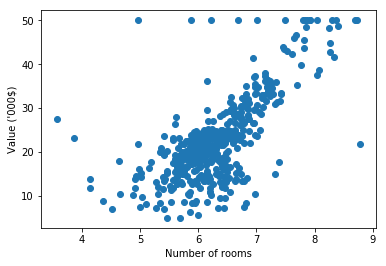

In [20]:
plt.xlabel('Number of rooms')
plt.ylabel("Value ('000$)")
plt.scatter(X_rooms, y)
plt.show()

Linear regression is for minimizing the residual for ax+b

In [21]:
linear_reg = linear_model.LinearRegression()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size = 0.3, random_state=13)

In [34]:
# Fit the model to the data
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# R^2  score on test data
print(linear_reg.score(X_test, y_test))

0.508720722955


In [37]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
y_pred = linear_reg.predict(prediction_space)

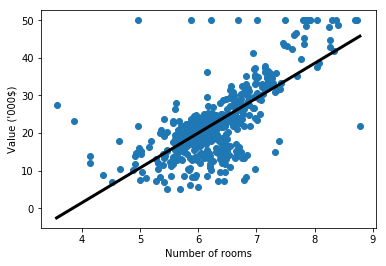

In [38]:
# Plot regression line
plt.xlabel('Number of rooms')
plt.ylabel("Value ('000$)")
plt.scatter(X_rooms, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error

y_pred = linear_reg.predict(X_test)
print("R^2: {}".format(linear_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5087207229554374
Root Mean Squared Error: 6.3702932428805195


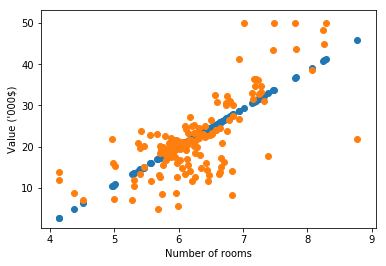

In [44]:
plt.xlabel('Number of rooms')
plt.ylabel("Value ('000$)")

plt.scatter(X_test, y_pred)
plt.scatter(X_test, y_test)
# plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()